## Telco Customer Churn

Link to Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about:

- Customers who left within the last month – the column is called Churn


- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


- Demographic info about customers – gender, age range, and if they have partners and dependents


**Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
%load_ext watermark
%watermark -d -u -a '<Micaela>' -v -p numpy

<Micaela> 
last updated: 2021-01-20 

CPython 3.8.5
IPython 7.19.0

numpy 1.19.2


In [3]:
mydata = pd.read_csv("Telco_Customers.csv")

In [4]:
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
mydata.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7503-EPSZW,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observations: 
- Drop Customerid; provides no insight
- TotalCustomers is object; should be float
- Need to do dummy varibles on all object columns and SeniorCitizen

In [7]:
#drop customer id
mydata = mydata.drop('customerID', 1)

In [8]:
mydata[~mydata['TotalCharges'].str.match('^\d*\.?\d*$')].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [9]:
mydata.loc[488, 'TotalCharges']

' '

In [10]:
# see if any strings in column
mydata[~mydata['TotalCharges'].str.match('^\d*\.?\d*$')]
print("Number of TotalCharges null: ",mydata[~mydata['TotalCharges'].str.match('^\d*\.?\d*$')].shape[0])

Number of TotalCharges null:  11


In [11]:
# drop total charges for new customers (< 1 month);
mydata.drop(mydata[mydata['TotalCharges'] == ' '].index, inplace=True)

In [12]:
# change to dtype to float 
mydata['TotalCharges'] = mydata['TotalCharges'].astype(float)
mydata.shape

(7032, 20)

In [13]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
df = mydata.copy()
cat_cols = list(df.select_dtypes(include=['object']))
cat_cols.append("SeniorCitizen")


paymentMethods = df.PaymentMethod.unique()
# make payment method binary (manuel == 0, automatic == 1)
df['PaymentMethod'] = df["PaymentMethod"].replace(paymentMethods, ['manuel','manuel','automatic','automatic'])
df['SeniorCitizen'] = df['SeniorCitizen'].replace([0,1], ['No', 'Yes'])

def getDummies(data, cols):
    for feature in cols:
        newData = pd.get_dummies(data[feature],prefix = feature)
        data = pd.concat([data, newData], 1)
    return data
                                 
dfDummies = getDummies(df,cat_cols)
dfDummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_automatic,PaymentMethod_manuel,Churn_No,Churn_Yes,SeniorCitizen_No,SeniorCitizen_Yes
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0,0,1,0,1,1,0,1,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,1,0,1,0,0,1,1,0,1,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,0,0,0,1,0,1,0,1,1,0
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,1,0,1,0,1,0,1,0,1,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,0,1,0,1,0,1,1,0


**Exploratory Data Analysis (EDA)**

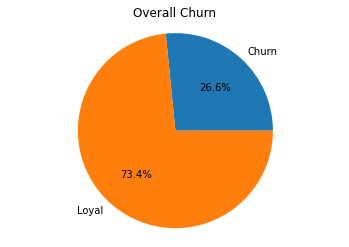

In [15]:
churnRate = round((dfDummies[dfDummies.Churn_Yes == 1].shape[0]/dfDummies.shape[0])*100, 2)
sc_data = [churnRate, 100.00-churnRate]
labels = 'Churn','Loyal'
plt.pie(sc_data,labels=labels,autopct='%1.1f%%')
plt.title('Overall Churn')
plt.axis('equal')
plt.show()

**Demographics**

*Age*

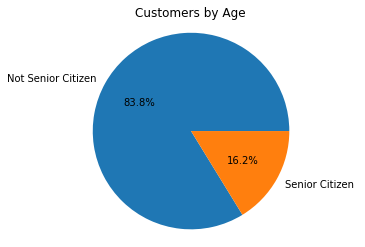

In [16]:
# Pie chart by age; make these f(x)
sc_data = [(dfDummies.SeniorCitizen_No == 1).sum()/dfDummies.shape[0]*100,
           (dfDummies.SeniorCitizen_Yes == 1).sum()/dfDummies.shape[0]*100]
labels = 'Not Senior Citizen','Senior Citizen'
plt.pie(sc_data,labels=labels,autopct='%1.1f%%')
plt.title('Customers by Age')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

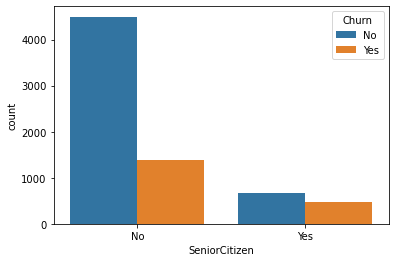

In [17]:
sns.countplot(x = 'SeniorCitizen',hue = 'Churn' ,data =dfDummies)

In [18]:
Seniors = dfDummies.loc[dfDummies.SeniorCitizen_Yes == 1]
nonSeniors = dfDummies.loc[dfDummies.SeniorCitizen_No == 1]
#Churn

SeniorChurn = round(Seniors[Seniors.Churn_Yes == 1].shape[0]/ Seniors.shape[0]*100,2)
nonSeniorChurn = round(nonSeniors[nonSeniors.Churn_Yes == 1].shape[0]/ nonSeniors.shape[0]*100,2)

print('Non-senior Churn:', nonSeniorChurn, "%\n")
print('Senior Churn:', SeniorChurn, "%\n")

Non-senior Churn: 23.65 %

Senior Churn: 41.68 %



Seniors Churn rate is signifigantly higher than overall and non-senior churn.

May be a good predictor

*Dependents*

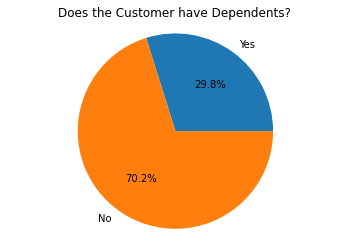

In [19]:
# dependents
dep_data = [(dfDummies.Dependents == 'Yes').sum()/dfDummies.shape[0]*100,
            (dfDummies.Dependents == 'No').sum()/dfDummies.shape[0]*100]
labels = 'Yes','No'
plt.pie(dep_data,labels=labels,autopct='%1.1f%%')
plt.title('Does the Customer have Dependents?')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

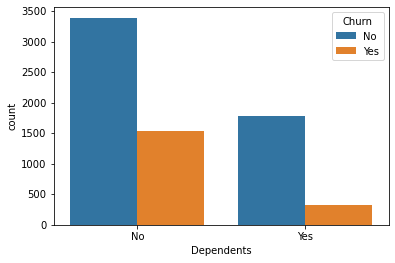

In [21]:
sns.countplot(x = 'Dependents', hue = 'Churn', data = dfDummies)

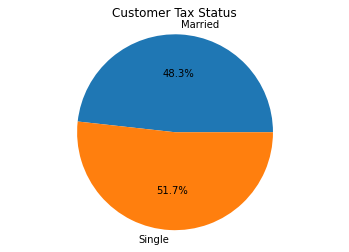

In [22]:
#Filing status 
partner_data = [(dfDummies.Partner == 'Yes').sum()/dfDummies.shape[0]*100,
                (dfDummies.Partner == 'No').sum()/dfDummies.shape[0]*100]
labels = 'Married','Single'
plt.pie(partner_data,labels=labels,autopct='%1.1f%%')
plt.title('Customer Tax Status')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Partner', ylabel='count'>

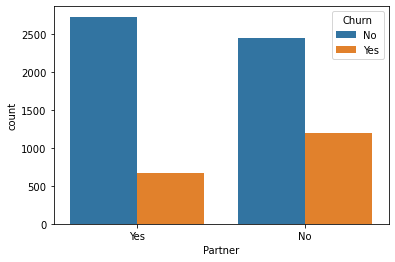

In [23]:
sns.countplot(x = 'Partner', hue = 'Churn', data = dfDummies)

**Customer account information**

*Tenure*

In [ ]:
sns.displot(mydata['tenure'], binwidth = 6)

Top 2 customer groups

- ~0-6 months
- ~66-72 months

In [ ]:
tenure_plot = sns.boxplot(y = "tenure", data = mydata)
tenure_plot.set_title('Tenure Boxplot')

- 50% of customers are with Telco between 10-55 months 
- Typical customer is with Telco for 30 months 

In [ ]:
ten_vs_churn = sns.boxplot(x = "Churn", y = "tenure", data = mydata)
ten_vs_churn.set_title('Tenure vs Churn')

- 75% of customers that churn are with Telco for 30 months or less
- Typical customer that churned was with the company for 10 months

In [ ]:
oneYearTenure = round(mydata[mydata.tenure <=30].shape[0]/mydata.shape[0]*100,2)
print("Percentage of customers with the company for 30 months or less:",oneYearTenure,"%")

- More than half of the customer base has been with the company for 30 months or less 

In [ ]:
mydata.corr()

- Negative, weak correlation between tenure and Churn

*Monthly Charges*

In [ ]:
MonthlyCharges_plot = sns.boxplot(y = "MonthlyCharges", data = mydata)
MonthlyCharges_plot.set_title('Monthly Charges Boxplot')

- Mean: ~ 70
- IQR: ~35-90

In [ ]:
sns.displot(mydata['MonthlyCharges'], binwidth = 10)

Most frequent amount paid: 
- 18.25 - 28.25

In [ ]:
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = mydata)

- Customer that churned tends to pay higher than a loyal customer

In [ ]:
sns.lineplot(x = "tenure", y = "MonthlyCharges", data = mydata, hue='Churn')

Observations: 
- Typically, a customer that churned pays more than a loyal customer

*Contract*

In [ ]:
#total charges vs contract; 

In [ ]:
# contract vs churn; stacked bar graph 

In [ ]:
mydata.var()

**Machine Learning - Logistic Regression**

Since the dependent variable, Churn, is binary (Yes, No), I will use logistic regression.